<a href="https://colab.research.google.com/github/abidshafee/dataAnalysis/blob/master/Outliers_Removing_Technique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

An Outlier of a dataset defines as a value that is more than 3 standard deviations away from the mean. So removing outliers from a df removes any row in the dataset which contains an outlier. Outlier calculation are performed seperately for each column.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from datetime import datetime

In [2]:
mpl.rcParams['figure.figsize'] = (12, 7)

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/abidshafee/autoML-tsModel/main/throughput_metrics.csv", parse_dates=['Time'], index_col='Time')

In [4]:
df.describe(include='all')

,SiteA,SiteB,SiteC,SiteD,SiteE,SiteF
count,8.760000e+03,8.760000e+03,8.760000e+03,8.760000e+03,8.760000e+03,8.760000e+03
mean,1.134300e+10,1.050114e+10,2.422851e+07,7.645930e+07,8.169740e+07,1.194613e+06
std,5.843792e+09,8.509006e+09,3.285736e+07,6.293577e+07,1.297177e+08,8.569518e+05
min,3.227624e+08,0.000000e+00,1.013134e+04,7.408801e+05,0.000000e+00,3.786450e+05
25%,7.677623e+09,3.942119e+09,4.546207e+04,2.792179e+07,1.817469e+07,8.628346e+05
50%,1.002482e+10,8.836137e+09,8.613927e+04,5.725981e+07,5.025162e+07,9.951363e+05
75%,1.335055e+10,1.452307e+10,4.363564e+07,1.097949e+08,9.435435e+07,1.243718e+06
max,7.553718e+10,5.229297e+10,2.513275e+08,3.593521e+08,1.578908e+09,2.659389e+07


In [5]:
df.head()

,SiteA,SiteB,SiteC,SiteD,SiteE,SiteF
Time,,,,,,
2018-01-01 08:00:00,1.411093e+10,1.109243e+09,8.289831e+07,56650005.21,1.117868e+07,827420.9772
2018-01-01 09:00:00,1.345362e+10,1.242256e+09,4.375739e+04,49307351.26,7.070847e+06,913017.6007
2018-01-01 10:00:00,1.216888e+10,2.006322e+09,4.315725e+04,56843652.59,5.132826e+07,874471.3644
2018-01-01 11:00:00,1.123120e+10,1.073181e+09,8.277154e+07,46645240.59,5.217827e+06,837246.7783
2018-01-01 12:00:00,1.078085e+10,8.645069e+08,3.343548e+04,30966947.37,7.495363e+06,827143.7497


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6eddbb02d0>,
      dtype=object)

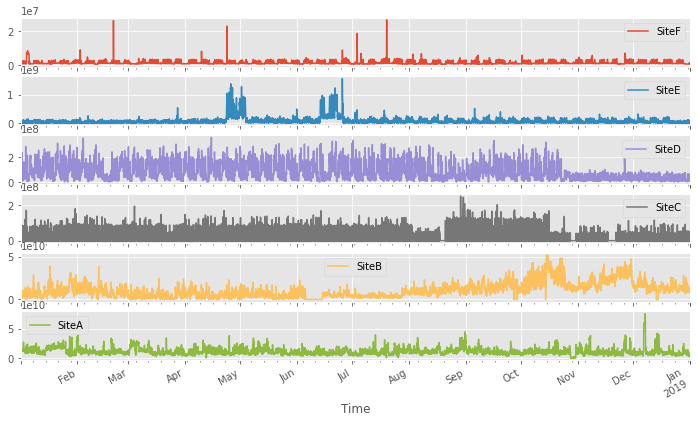

In [6]:
df[['SiteF','SiteE','SiteD','SiteC','SiteB','SiteA']].plot(subplots=True)

## Detecting Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


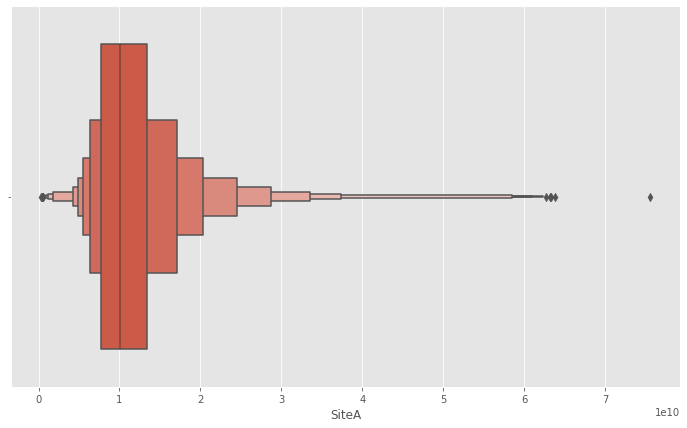

In [7]:
sns.boxenplot(df['SiteA'])

## Removing Outliers

In [8]:
import scipy.stats as sst

In [9]:
z_score = sst.zscore(df)

In [10]:
abs_z_scores = np.abs(z_score)
filter_data = (abs_z_scores<3).all(axis=1)
ndf = df[filter_data]

Because Outlier of a dataset defines as a value that is more than 3 (std) standard deviations away from the mean

In [11]:
ndf.describe(include='all')

,SiteA,SiteB,SiteC,SiteD,SiteE,SiteF
count,8.020000e+03,8.020000e+03,8.020000e+03,8.020000e+03,8.020000e+03,8.020000e+03
mean,1.089490e+10,1.017486e+10,2.221227e+07,7.463415e+07,6.493073e+07,1.138001e+06
std,4.677106e+09,7.827163e+09,2.948598e+07,5.944100e+07,6.554482e+07,4.968708e+05
min,3.227624e+08,0.000000e+00,1.013134e+04,7.408801e+05,0.000000e+00,3.786450e+05
25%,7.585398e+09,3.924188e+09,4.462231e+04,2.795316e+07,1.805817e+07,8.577731e+05
50%,9.947878e+09,8.804392e+09,8.309603e+04,5.714333e+07,4.778185e+07,9.873443e+05
75%,1.309531e+10,1.430653e+10,4.361442e+07,1.074430e+08,8.731451e+07,1.223998e+06
max,2.886420e+10,3.595057e+10,1.227131e+08,2.628644e+08,4.685181e+08,3.764824e+06


In [12]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8020 entries, 2018-01-01 08:00:00 to 2019-01-01 07:00:00
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SiteA   8020 non-null   float64
 1   SiteB   8020 non-null   float64
 2   SiteC   8020 non-null   float64
 3   SiteD   8020 non-null   float64
 4   SiteE   8020 non-null   float64
 5   SiteF   8020 non-null   float64
dtypes: float64(6)
memory usage: 438.6 KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


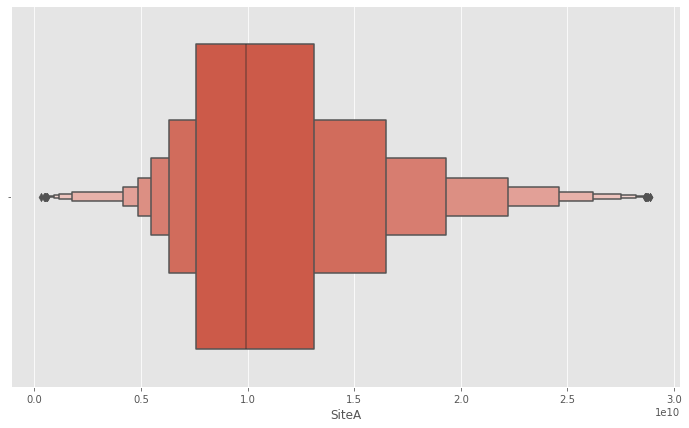

In [13]:
sns.boxenplot(ndf['SiteA'])

In [14]:
print(df.shape)
print(ndf.shape)

(8760, 6)
(8020, 6)


(array([814., 714., 654., 603., 570., 589., 583., 551., 511., 444., 374.,
        266., 221., 194., 149., 134., 114., 107.,  75.,  78.,  62.,  63.,
         67.,  50.,  33.]),
 array([0.00000000e+00, 1.43802260e+09, 2.87604520e+09, 4.31406780e+09,
        5.75209040e+09, 7.19011300e+09, 8.62813560e+09, 1.00661582e+10,
        1.15041808e+10, 1.29422034e+10, 1.43802260e+10, 1.58182486e+10,
        1.72562712e+10, 1.86942938e+10, 2.01323164e+10, 2.15703390e+10,
        2.30083616e+10, 2.44463842e+10, 2.58844068e+10, 2.73224294e+10,
        2.87604520e+10, 3.01984746e+10, 3.16364972e+10, 3.30745198e+10,
        3.45125424e+10, 3.59505650e+10]),
 <a list of 25 Patch objects>)

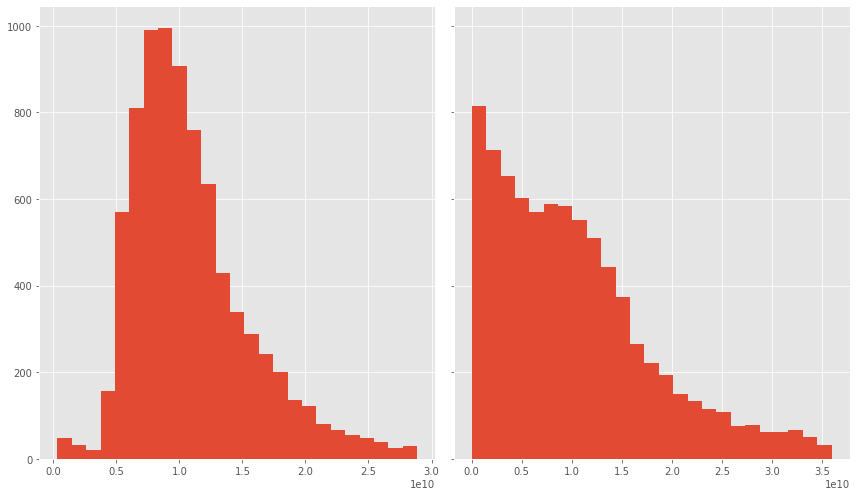

In [21]:
n_bins = 25
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the *bins* keyword argument.
axs[0].hist(ndf['SiteA'], bins=n_bins)
axs[1].hist(ndf['SiteB'], bins=n_bins)